# Topic Extraction in Newsfeeds
* Autor: Prof. Dr. Johannes Maucher
* Datum: 17.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __RSS Feeds:__ Struktur von RSS Feeds analysieren und parsen mit dem _Universal Feed Parser_. 
* __Dokument Analyse:__ Die Häufigkeit aller Worte in einem Dokument (Inhalt des RSS Feeds) zählen und in einem Array verwalten. 
* __Merkmalsextraktion:__ Bestimmung von Merkmalen (hier auch: __Topics__) (Allgemein spricht man von Merkmalen. Im Fall, dass die NNMF auf Dokumente angewandt wird, werden die Merkmale auch mit __Topics__ oder __Themen__ bezeichnet) mit der \emph{Non Negative Matrix Factorization}.
* __Zuordnung__: Wie setzen sich die Topics aus den Wörtern zusammen? Wie stark sind die gefundenen Topics in den Artikeln vertreten?
* __Dokument Clustering:__ Mit der NNMF kann auch ein Clustering realisiert werden. Jeder Topic repräsentiert ein Cluster. Jedes Dokument wird dem Cluster zugeordnet, dessen Topic am stärksten in ihm vertreten ist. 

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung

Stellen Sie sich vor Sie möchten in eine eigene Webseite die RSS Feeds einer Menge von Nachrichtenservern einbinden. Da die unterschiedlichen Server wahrscheinlich Artikel zu den gleichen Themen anbieten, werden die Inhalte einiger Artikel ähnlich sein. Mit der __Nicht Negativen Matrixfaktorisierung (NNMF)__ kann für eine große Menge von Dokumenten eine Menge von Themen (Topics) ermittelt werden, auf die sich die Dokumente beziehen. Damit ist es u.a. möglich
* die Dokumente thematisch zu ordnen
* zu jedem Thema nur ein Dokument anzuzeigen

### Ähnlichkeiten bestimmen und relevante Merkmale extrahieren

Eine Sammlung von Dokumenten - in diesem Versuch die Menge aller Nachrichten der angegebenen Feeds - kann in einer Artikel/Wort-Matrix repräsentiert werden. Jede Zeile dieser Matrix gehört zu einem Dokument. Für jedes Wort, das mindestens in einem der Dokumente vorkommt, ist eine Spalte vorgesehen. Das Matrixelement in Zeile $i$, Spalte $j$ beschreibt wie häufig das Wort in Spalte $j$ im zur Zeile $i$ gehörenden Dokument vorkommt.

Unter der Annahme, dass Artikel umso ähnlicher sind, je mehr Worte in diesen gemeinsam vorkommen, kann auf der Grundlage dieser Matrix die Ähnlichkeit zwischen den Artikeln berechnet werden. Hierzu könnte die Matrix z.B. einfach einem _Hierarchischen Clustering_ übergeben werden. Das hierarchische Clustering weist jedoch im Fall einer großen Menge von zu vergleichenden Objekten zwei wesentliche Nachteile auf: Erstens ist die wiederholte Berechnung der Distanzen zwischen allen Artikeln/Clustern extrem rechenaufwendig, zweitens ist die Darstellung einer großen Anzahl von Objekten im Dendrogramm nicht mehr übersichtlich. 

Für das Auffinden von Assoziationen zwischen Dokumenten hat sich in den letzten Jahren die Methode der __Nicht-Negativen Matrix Faktorisierung (NNMF)__ etabliert. Mit dieser Methode kann eine Menge von wesentlichen Merkmalen berechnet werden, anhand derer sich die Dokumente clustern lassen, d.h. Dokumente des gleichen Clusters repräsentieren das gleiche Merkmal (Thema). Ein solches Merkmal wird durch eine Menge von Worten beschrieben, z.B. $\{$ _Paris, terror, IS_ $\}$  oder $\{$_refugee, syria, border_ $\}$. Neben der Merkmalsextraktion stellt die relativ geringe Komplexität einen weiteren Vorteil der NNMF dar. Durch die Darstellung der Artikel/Wort-Matrix als Produkt von 2 Faktormatrizen müssen deutlich weniger Einträge gespeichert werden.

### Nicht Negative Matrixfaktorisierung: Die Idee

Die Artikel/Wort-Matrix wird im Folgenden mit $A$ bezeichnet. Sie besitzt $r$ Zeilen und $c$ Spalten, wobei $r$ die Anzahl der Artikel und $c$ die Anzahl der relevanten Worte in der Menge aller Artikel ist. Durch Multiplikation der Matrix $A$ mit dem Vektor $v$ (_wordvec_: Vektor der alle relevanten Worte enthält) werden die Worte den Artikeln $a$ (_articletitles_: Vektor der alle Artikeltitel enthält) zugeordnet:

$$
a=A*v.
$$

Die Idee der NNMF besteht darin die Matrix $A$ als Produkt zweier Matrizen $W$ und $H$ darzustellen,

$$
A=W*H
$$

wobei alle Elemente in $W$ und $H$ größer oder gleich Null sein müssen. Die Matrixmultiplikation erfordert, dass die Anzahl der Zeilen $m$ in $H$ gleich der Anzahl der Spalten in $W$ sein muss. 
Durch die Faktorisierung der Matrix $A$ wird die Zuordnung der Wörter des Wortvektors $v$  zu den Artikeln des Vektors $a$ in zwei Stufen zerlegt. 

$$
f = H*v
$$
$$
a = W*f 
$$

In der ersten Stufe werden durch die Multiplikation von $v$ mit der Matrix $H$ die Wörter einem sogenannten Merkmalsvektor $f$ mit $m$ Elementen zugewiesen. In der zweiten Stufe werden durch die Multiplikation des Merkmalsvektor $f$ mit der Matrix $W$ die einzelnen Merkmale den Artikeln in $a$ zugeordnet. Die Matrix $H$ definiert also aus welchen Wörtern die Merkmale gebildet werden. Sie wird deshalb __Merkmalsmatrix__ genannt. Die Matrix $W$ hingegen beschreibt mit welchem Gewicht die einzelnen Merkmale in den verschiedenen Artikeln auftreten. Sie wird deshalb __Gewichtungsmatrix__ genannt.

Daraus folgt: Wenn eine Faktorisierung der Matrix $A$ gefunden wird, dann werden damit auch relevante Merkmale, also die Themen, definiert, hinsichtlich derer die Artikel effizient kategorisiert werden. Durch die Matrixfaktorisierung wird eine __Merkmalsextraktion__ realisiert. 

### Berechnung der Matrixfaktoren

Für die Berechnung der Faktoren wurde in [Lee, Algortihms for Non-negative Matrix Factorisation](http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf) eine iterative Methode vorgestellt, die derzeit wohl am häufigsten angewandt wird und auch in dieser Übung implementiert werden soll. Der Algorithmus besteht aus folgenden Schritten:
* Gebe die zu faktorisierende Matrix $A$ ein. $r$ sei die Anzahl der Zeilen und $c$ die Anzahl der Spalten von $A$.
* Wähle die Anzahl $m$ der Merkmale, mit $m<c$. _Tipp:_ Für $m$ sollte zunächst ein Wert im Bereich $15$ bis $30$ gewählt werden.
* Lege eine $m \times c$ Matrix $H$ an mit initial zufälligen Elementen (Anwendung der numpy Funktion _random.random()_)
* Lege eine $r \times m$ Matrix $W$ an mit initial zufälligen Elementen (Anwendung der numpy Funktion _random.random()_)
* Wiederhole bis maximale Anzahl der Iteration erreicht oder Kosten $k$ unter vordefinierter Schwelle:

	* Berechne aktuelles Produkt $B=W*H$ und bereche die Kostenfunktion 
		$$
			k=\left\| A - B \right\|^2 = \sum\limits_{i,j} \left(A_{i,j} - B_{i,j}\right)^2
		$$ 
	* Anpassung der Matrix $H$ durch folgende Neuberechnung der Matrixelemente
    
		$$
		H_{i,j} := H_{i,j} \frac{(W^T*A)_{i,j}}{(W^T*W*H)_{i,j}}
		$$
        
	* __Nach__ der Anpassung der Matrix $H$: Anpassung der Matrix $W$ durch folgende Neuberechnung der Matrixelemente
    
		$$
		W_{l,i} := W_{l,i} \frac{(A*H^T)_{l,i}}{(W*H*H^T)_{l,i}}
		$$

In [Lee, Algortihms for Non-negative Matrix Factorisation](http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf) ist bewiesen, dass durch die o.g. Anpassungsroutinen die Kosten $k$ monoton abnehmen und in einem Minimum konvergieren. Der Algorithmus ist jedoch nicht optimal weil das gefundene Minimum ein lokales Minimum sein kann.

 ## Vor dem Versuch zu klärende Fragen
 
 * Was versteht man unter Artikel/Wort-Matrix? Wie wird diese im aktuellen Versuch gebildet?

|      | Spalte   |  1.  |   2. |
| ---- |:-------------:| -----:|
|Zeile | Doclist | 'wort1' | 'wort2' |
|   1.  | Doc1 |  1   |  0   | 
|   2.  | Doc2 |  0   |  0   | 
|   3.  | Doc3 |  0   |  0   |  

Jede Zeile dieser Matrix gehört zu einem Dokument. Für jedes Wort, das mindestens in einem der Dokumente vorkommt, ist eine Spalte vorgesehen. Das Matrixelement in Zeile  i, Spalte  j beschreibt wie häufig das Wort in Spalte j im zur Zeile i gehörenden Dokument vorkommt.

 
Gebildet wird diese Matrix in dem man eine bereinigte Liste aus allen Wörtern zu jedem Dokument erstellt wird. Zur Bereinigung zählen: Stoppwörter, Doppelte Wörter und Satzzeichen zu entfernen (Tokenizing). Außerdem das Normalisieren der Wortmenge. Diese Listen werden in einer Liste gespeichert.
Anschließend wird aus diesem Objekt ein Gensim-Dictionary erzeugt. Es besitzt nun die Eigenschaft, dass es jedem relevanten Wort (Key) einen zufälligen, eindeutigen  Index (Value) erzeugt. 


Um die Performance zu erhöhen wird die Efficient Corpus Representation eingesetzt. Dabei wird aus dem Dictionary eine Liste aus Tupeln erzeugt, wobei der erste Wert, der Indize des Wortes ist und der zweite Wert die Häufigkeit des Wortes repräsentiert. Dies bildet den Corpus.

* Wie multipliziert man die Matrix
    $$
    A= \left( \begin{array}{cccc}
a_{00} & a_{01} & a_{02} & a_{03} \\ 
a_{10} & a_{11} & a_{12} & a_{13} \\ 
a_{20} & a_{21} & a_{22} & a_{23}
\end{array} \right)
    $$
    mit dem Vektor  
    $$
    v=\left( \begin{array}{c}
v_{0} \\ 
v_{1} \\ 
v_{2} \\ 
v_{3}
\end{array} \right)
    $$
    

So multipliziert man die Matrix:
    $$
    a = A * v = \left( \begin{array}{cccc}
a_{00} & a_{01} & a_{02} & a_{03} \\ 
a_{10} & a_{11} & a_{12} & a_{13} \\ 
a_{20} & a_{21} & a_{22} & a_{23}
\end{array} \right)
     *    
\left( \begin{array}{c}
v_{0} \\ 
v_{1} \\ 
v_{2} \\ 
v_{3}
\end{array} \right)
     =
\left( \begin{array}{c}
a_{00}*v_{0} + a_{01}*v_{1} + a_{02}*v_{2} + a_{03}*v_{3}  \\ 
a_{10}*v_{0} + a_{11}*v_{1} + a_{12}*v_{2} + a_{13}*v_{3} \\ 
a_{20}*v_{0} + a_{21}*v_{1} + a_{22}*v_{2} + a_{23}*v_{3} \\ 
a_{30}*v_{0} + a_{31}*v_{1} + a_{32}*v_{2} + a_{33}*v_{3}
\end{array} \right)
    $$
    
Die Voraussetzung das zwei Matritzen *A* , *v* miteinander multipliziert werden können ist das die Anzahl der spalten in *A* der Anzahl der Zeilen in *v* entspricht. Da in diesem Fall *v* ein Vektor ist, muss er genau so viele Dimensionen haben wie die Matrix Spalten.

* Was versteht man im Kontext der NNMF unter
    * Merkmalsmatrix
    * Gewichtsmatrix

Die Merkmalsmatrix H beschreibt, wie stark die Worte aus in jedem Merkmal enthalten sind. Jede Zeile von H gehört zu einem Merkmal, jede Spalte von H gehört zu einem Wort. Durch diese Merkmale lassen sich Topics beschreiben.

Die Gewichtsmatrix W beschreibt, wie stark die Merkmale in den jeweiligen Artikeln enthalten sind. Jede Zeile von  W gehört zu einem Artikel, jede Spalte von W gehört zu einem Merkmal. Annhand der Zeileneinträge lässt sich ablesen zu welchen topics das Dokument gehört.

* Wie werden in Numpy zwei Arrays (Typ numpy.array) 
	* im Sinne der Matrixmultiplikation miteinander multipliziert?
	* elementweise multipliziert?
* Wie wird die Transponierte eines Numpy-Arrays berechnet?

**Elementweise:**

`np.multiply(x1, x2)`

**Matrixmultiplikation:**

`np.matmul(a, b)`

**Transponierten:**

`np.transpose(x)`

# Versuchsdurchführung
Die in diesem Versuch einzubindenden Feeds sind in der unten stehenden Liste _feedlist_ definiert. Die aus dem vorigen Vesuch bereits bekannte Funktion _stripHTML()_ ist ebenfalls gegeben:

In [1]:
import sys
sys.path.append("./resources/")
import feedparser
import numpy as np
import pandas as pd

feedlist=['http://feeds.reuters.com/reuters/topNews',
          'http://feeds.reuters.com/reuters/businessNews',
          'http://feeds.reuters.com/reuters/worldNews',
          'http://feeds2.feedburner.com/time/world',
          'http://feeds2.feedburner.com/time/business',
          'http://feeds2.feedburner.com/time/politics',
          'http://rss.cnn.com/rss/edition.rss',
          'http://rss.cnn.com/rss/edition_world.rss',
          'http://www.nytimes.com/services/xml/rss/nyt/GlobalHome.xml',
          'http://feeds.nytimes.com/nyt/rss/Business',
          'http://www.nytimes.com/services/xml/rss/nyt/World.xml',
          'http://www.nytimes.com/services/xml/rss/nyt/Economy.xml'
          ]

In [2]:
def stripHTML(h):
  p=''
  s=0
  for c in h:
    if c=='<': s=1
    elif c=='>':
      s=0
      p+=' '
    elif s==0: p+=c
  return p

In [4]:
rssfeeds = pd.DataFrame(columns=['title','text','source'])

print "--------------------Articles------------------------"
for feed in feedlist:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
      #print '\n---------------------------'
      if 'summary' in e.keys() and len(e.summary) > 10 and 'title' in e.keys() and len(e.title) > 10:
        text = stripHTML(e.description)
        title = stripHTML(e.title)
        rssfeeds = rssfeeds.append(pd.DataFrame({'title': title, 'text': text, 'source': feed}, index=[0]), ignore_index=True)
print "------------------------------------------------------"
print "------------------------------------------------------"
print len(rssfeeds)

--------------------Articles------------------------
******************************
http://feeds.reuters.com/reuters/topNews
******************************
http://feeds.reuters.com/reuters/businessNews
******************************
http://feeds.reuters.com/reuters/worldNews
******************************
http://feeds2.feedburner.com/time/world
******************************
http://feeds2.feedburner.com/time/business
******************************
http://feeds2.feedburner.com/time/politics
******************************
http://rss.cnn.com/rss/edition.rss
******************************
http://rss.cnn.com/rss/edition_world.rss
******************************
http://www.nytimes.com/services/xml/rss/nyt/GlobalHome.xml
******************************
http://feeds.nytimes.com/nyt/rss/Business
******************************
http://www.nytimes.com/services/xml/rss/nyt/World.xml
******************************
http://www.nytimes.com/services/xml/rss/nyt/Economy.xml
--------------------------------

In [5]:
print rssfeeds.sample(5)

                                                source  \
199          http://feeds.nytimes.com/nyt/rss/Business   
37       http://feeds.reuters.com/reuters/businessNews   
213          http://feeds.nytimes.com/nyt/rss/Business   
163  http://www.nytimes.com/services/xml/rss/nyt/Gl...   
60             http://feeds2.feedburner.com/time/world   

                                                  text  \
199  Mike Cagney was ousted as chief executive of S...   
37   Toyota Motor Corp  is doubling down on its inv...   
213  Twitter’s higher-than-expected revenue was ove...   
163  The seven companies targeted by the F.D.A. for...   
60   "I fell, but only who falls can pick himself up."   

                                                 title  
199  Sex Scandal Toppled a Silicon Valley Chief. In...  
37   Toyota plans to expand production, shrink cost...  
213     Twitter Stock Drops After User Numbers Decline  
163  Vaginal Laser Treatments Can Cause Burns and S...  
60   ‘The Truth I

## Anlegen der Artikel/Wort-Matrix

### Die Funktion _getarticlewords()_
Schreiben Sie eine Funktion _getarticlewords()_, die folgende Elemente zurückgibt:

* _allwords:_ ist ein Dictionary dessen Keys die Worte aller gesammelten Artikel sind. Der zu jedem Key gehörende Wert ist die Anzahl, wie oft das Wort insgesamt vorkommt.
* _articlewords:_ ist eine Liste mit so vielen Elementen wie Artikel in der Sammlung sind. Jedes Listenelement ist ein Dictionary, welches die Worte des jeweiligen Artikels als Key enthält und als Wert die Worthäufigkeit.
* _articletitles_ ist eine Liste mit so vielen Elementen wie Artikel in der Sammlung sind. Jedes Element ist der Artikeltitel als String.

Für das Parsing der Feeds soll wieder das Modul _feedparser_ eingesetzt werden. Die zu einer Nachricht gehörenden Wörter sollen die Wörter des Elements _title_ und die Wörter des Elements _description_ sein (siehe voriger Versuch). Allerdings sollen hier nicht alle Wörter eingebunden werden, sondern wie im vorigen Versuch eine Methode _getwords()_ implementiert werden, welche nur die _relevanten_ Wörter zurückgibt. Die Frage welche Wörter relevant sind ist nicht eindeutig beantwortbar. Sie können sich hierzu eigene Antworten einfallen lassen. Auf jeden Fall sollten aber die Stopwörter ignoriert werden. Hierzu kann z.B. die Stopwortliste von NLTK angewandt werden.

Nachdem alle relevanten Wörter aller Nachrichten gesammelt sind, sollte eine weitere Bereinigung stattfinden, die 

* alle Wörter, die weniger als 4 mal vorkommen
* alle Wörter, die in mehr als 30% aller Dokumente vorkommen

entfernt. 

Durch dieses Herausfiltern nicht relevanter Wörter kann es vorkommen, dass einzelne Artikel keine relevanten Wörter mehr enthalten. Diese Artikel sollen dann ganz ignoriert werden. D.h. unter anderem, dass diese Artikel auch nicht in _articlewords_ und _articletitles_ erscheinen.

In [6]:
from collections import defaultdict
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams

def to_dict(d):
    '''helper class – converts defaultdict to regular dict'''
    if isinstance(d, defaultdict):
        d = {k: to_dict(v) for k, v in d.iteritems()}
    if isinstance(d, list):
        for i, v in enumerate(d):
            d[i] = to_dict(v)
    return d

def getwords_adv(doc):
    
    #doc = doc.lower()
    
    #tokenize
    tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
    tokens = tokenizer.tokenize(doc)
    
    #stemming
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = { 'go', 'great', 'this', 'like', 'it', 'las', 'took', 'us', 'sinc', 
                        'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
                        'sunday', 'weekend', 'month', 'week', 'may', 'ever', 'take', 'u', 
                        'said', 'say','e', 'describ', 'see', 'reuter','new', 'next', 'could', 
                        'year', 'want', 'join', 'end', 'talk', 'first', 'run', 'sign', 'befor', 
                        'epic', 'old', 'echo', 'man', 'file', 'hundr', 'open', 'sent', 'chang', 
                        'meet', 'would', 'million', 'arriv', 'becaus', 'alway', 'given', 'apart',
                       'one','two','three','four','five','six','seven','eight','nine','zero',
                        'fals', 'tru', 'excel', 'make', 'made', 'day'}
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words]
    
    #add bigrams
    '''docsting = ' '.join(tokens).strip()
    n = 2
    n_grams = ngrams(docsting.split(), n)
    tokens = tokens + [' '.join(grams) for grams in n_grams]'''
    
    #remove words smaller than 4 and bigger than 60
    tokens = [token for token in tokens if len(token) in range(3,60)]
    return tokens

def getarticlewords(articles):
    allwords = defaultdict(int)
    articletitles = []
    articlewords = []
    
    for index, row in articles.iterrows():
        title = row.loc['title']
        fulltext = row.loc['title'] + ' ' + row.loc['text']
        # add articletitles
        articletitles.append(title)
        # add articlewords
        words = getwords_adv(fulltext)
        wordsdict = defaultdict(int)
        for word in words: 
            wordsdict[word] += 1
            # extend allwords
            allwords[word] += 1
        articlewords.append(wordsdict)
    
    #gather words where count is lower 4
    wordsToRemove = []
    for word,count in allwords.items():
        if count < 3:
            #gather words to be removed
            wordsToRemove.append(word)
    #print len(wordsToRemove)
            
    #gather words that are included in more than 30% of all documents
    for word in allwords:
        articlecount = len(articlewords)
        countofwordinarticles = 0
        for words in articlewords:
            if word in words:
                countofwordinarticles += 1    
        #print countofwordinarticles/float(articlecount)
        if float(countofwordinarticles)/float(articlecount) > .3:
            wordsToRemove.append(word)
    #print len(wordsToRemove)
    
    #remove wordstoremove from data
    for words in articlewords:
        for word in wordsToRemove:
            words.pop(word, None)
            allwords.pop(word, None)

    
    articlewords = to_dict(articlewords)
    
    # remove articles where no words are present
    for i, words in enumerate(articlewords):
        if len(words) < 1:
            #print 'deleted', i, words
            articlewords.pop(i)
        
    return to_dict(allwords),articlewords,articletitles

allwords,articlewords,articletitles = getarticlewords(rssfeeds)
print len(allwords)
print len(articlewords)
print articlewords[1]
print '\n',to_dict(allwords)
#print to_dict([to_dict(words) for words in articlewords])

645
278
{u'accus': 1, u'fraud': 1, u'elect': 1, u'trump': 2, u'manafort': 2, u'presidenti': 1, u'probe': 2, u'tax': 1, u'russia': 1, u'trial': 2, u'donald': 1, u'investig': 1, u'presid': 1, u'russian': 1, u'aid': 2, u'paul': 1, u'becom': 1, u'former': 1, u'bank': 1, u'feder': 1}

{u'chain': 3, u'global': 14, u'dollar': 5, u'focus': 4, u'protest': 11, u'tajikistan': 5, u'alp': 3, u'accus': 10, u'voter': 3, u'turkish': 4, u'tariff': 7, u'tweet': 6, u'father': 3, u'bike': 4, u'leav': 3, u'women': 7, u'religi': 3, u'digit': 4, u'woman': 7, u'pompeo': 8, u'far': 4, u'rise': 4, u'rouhani': 3, u'facebook': 8, u'govern': 17, u'veri': 4, u'tri': 4, u'school': 5, u'administr': 7, u'list': 4, u'democrat': 7, u'leader': 15, u'race': 3, u'team': 3, u'marri': 3, u'servic': 7, u'vehicl': 7, u'crop': 6, u'second': 3, u'street': 17, u'design': 4, u'lawyer': 3, u'download': 3, u'histori': 3, u'port': 3, u'index': 3, u'compar': 4, u'cast': 4, u'asia': 9, u'spokesman': 3, u'indian': 3, u'consecut': 3, u'p

### Die Funktion _makematrix()_
Schreiben Sie eine Funktion _makematrix()_, die aus dem Dictionary _allwords_ und der Liste _articlewords_ (vorige Aufgabe) die Artikel-/Wort-Matrix generiert. Die Einträge in der Matrix sollen die Häufigkeiten der Wörter im jeweiligen Dokument sein (term frequency tf). Die Artikel-/Wort-Matrix soll als 2-dimensionales Numpy Array angelegt werden.

In [7]:
def makematrix(articlewords, allwords):
    words = allwords.keys()
    A = np.zeros((len(articlewords), len(allwords)), dtype=int)
    for i, words_in_article in enumerate(articlewords):
        v = [words_in_article[word] if word in words_in_article else 0 for word in words]
        A[i] = v
    return A, words

A, words = makematrix(articlewords,allwords)
print type(A)
print A.shape
print A[0].shape
print A[0]

<type 'numpy.ndarray'>
(278, 645)
(645,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

## Die Nicht Negative Matrix Faktorisierung
Die Implementierung der NNMF ist entsprechend der Beschreibung im Theoriekapitel durchzuführen.

* Implementieren Sie die Funktion _cost(A,B)_. Dieser Funktion werden zwei Numpy-Matrizen $A$ und $B$ übergeben. Zurück geliefert werden die nach oben angegebener Formel berechneten Kosten $k$. Diese Funktion wird von der im folgenden beschriebenen Funktion _nnmf(A,m,it)_ benutzt.
* Implementieren Sie die Funktion __nnmf(A,m,it)__. In dieser Funktion soll der oben beschriebene Algorithmus für die Nicht-negative Matrix Faktorisierung ausgeführt werden. Der Funktion wird die zu faktorisierende Matrix $A$, die Anzahl der Merkmale $m$ und die Anzahl der Iterationen $it$ übergeben. Die Funktion gibt die gefundenen Faktoren $W$ und $H$ zurück. In jeder Iteration sollen mit der Funktion __cost(A,B)__ die Kosten berechnet werden. Sobald die Kostenabnahme pro 10 Iterationen kleiner als $2$ ist oder eine maximale Anzahl von Iterationen ($maxIt=200$) erreicht ist, soll der Algorithmus mit der Rückgabe der Faktoren $W$ und $H$ terminieren.     


Tipp für die Implementierung elementweiser Operationen von Matrizen: Für elementweise Operationen müssen in Python/Numpy nicht alle Elemente über Schleifen explizit berechnet werden. Eine elementweise Anpassung aller Matrixelemente kann kompakt programmiert werden indem die beteiligten Matrizen für diese Operationen als Arrays implementiert werden. Sollen z.B. die beiden gleich großen Numpy Arrays $U$ und $V$ elementweise multipliziert werden, dann wäre der entsprechende Programmcode einfach _U*V_.  

stagnation after 68 iterations



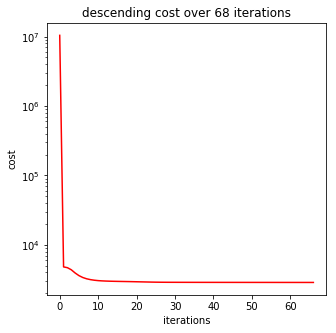

iter: 68 
cost: 2876.0300957019303 
[10394653.847296527, 4814.577306427971, 4693.036121301957, 4380.542530540489, 3939.1802585399923, 3606.837692566732, 3388.0380418993636, 3247.207471265146, 3156.7554576705493, 3096.6002947002225, 3055.6063051950123, 3029.1140631568787, 3011.215397691971, 2998.1128196610875, 2988.0846421586602, 2979.9354722480493, 2972.7388307112765, 2965.852459620291, 2958.6153199827354, 2950.7492790288748, 2942.1927181210085, 2933.51386324615, 2925.220012038879, 2916.949401784048, 2908.684547777022, 2901.9233862607357, 2897.298294841117, 2893.977698264784, 2891.7404891070837, 2890.3896747888375, 2889.332662987128, 2888.453448493136, 2887.704985172817, 2886.989314247383, 2886.265926003065, 2885.551773138858, 2884.957418410051, 2884.3401508108172, 2883.8356817497042, 2883.413851537729, 2883.068638657339, 2882.788646490087, 2882.5044646049932, 2882.161309077894, 2881.8340328486197, 2881.491992545904, 2881.1858723299965, 2880.9029611426286, 2880.604484982782, 2880.31239

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def calc_cost(A, B):
    '''cost funktion -> sum(A-B)^2'''
    return np.sum(np.square(A - B))

#print calc_cost(matrix_A, matrix_B)

def nnmf(A, m, it, threshhold=2):
    (r, c) = A.shape
        
    H = np.matrix(np.random.random((m, c)))
    W = np.matrix(np.random.random((r, m)))
    
    costs = []
    
    for i in range(it): 
        #Berechne aktuelles Produkt  B=W∗H
        B = W * H
        
        #Abbruchbedingung
        if len(costs) > 10 and (costs[-10] - costs[-1]) < threshhold:
            print "stagnation after", i+1, "iterations\n"
            break
        
        # Berechnung der Kosten
        costs.append(calc_cost(A, B))
        
        #Anpassung der Matrix  H
        H = np.multiply(H, (W.T * A)/(W.T*W*H))
        #Anpassung der Matrix  W
        W = np.multiply(W, (A * H.T)/(W*H*H.T))

    if it - 1 == i:
        print "reached max iterations\n"
    
    return (H, W, costs, i+1)


def cost(A, B):
    return np.sum(np.square(A - B))
    
H, W, costs, iterations = nnmf(A, 30, 200)

 # plot curve
plt.figure(figsize=(5, 5))
plt.plot(range(iterations-1), costs, '-k', c='r')
plt.yscale('log')
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(('descending cost over %d' % iterations + ' iterations'))
plt.show()
    
print 'iter:', iterations, '\ncost:', costs[-1],"\n",costs, "\nH:\n",H,'\nW:\n',W

## Anzeige der Merkmale und der Gewichte

Im vorigen Abschnitt wurde die Merkmalsmatrix $H$ und die Gewichtsmatrix $W$ berechnet. Diese Matrizen können natürlich am Bildschirm ausgegeben werden, was jedoch nicht besonders informativ ist. Aus den Matrizen können jedoch die Antworten für die folgenden interessanten Fragen berechnet werden:

* In welchen Artikeln sind welche Merkmale stark vertreten?
* Wie lassen sich die insgesamt $m$ Merkmale beschreiben, so dass aus dieser Merkmalsbeschreibung klar wird, welches Thema den Artikeln, in denen das Merkmal stark vertreten ist, behandelt wird? 
 
Die Antwort auf die erste Frage ergibt sich aus der Gewichtsmatrix $W$. Für die Beantwortung der zweiten Frage wird die Merkmalsmatrix $H$ herangezogen.

### Beschreibung der Merkmale

Die Merkmalsmatrix $H$ beschreibt, wie stark die Worte aus _wordvec_ in jedem Merkmal enthalten sind. Jede Zeile von $H$ gehört zu einem Merkmal, jede Spalte von $H$ gehört zu einem Wort in _wordvec_.

Es bietet sich an jedes Merkmal einfach durch die $N=6$ Wörter aus _wordvec_ zu beschreiben, welche am stärksten in diesem Merkmal enthalten sind. Hierzu muss für jedes Merkmal die entsprechende Zeile in $H$ nach den $N=6$ größten Werten durchsucht bzw. geordnet werden. Die entsprechenden Spalten dieser Matrixelemente verweisen dann auf die $N=6$ wichtigsten Worte des Merkmals.

Tipp für die Implementierung: Legen Sie für jedes Merkmal $i$ eine Liste an. Die Listenlänge ist durch die Anzahl der Worte in _wordvec_ (d.h. die Anzahl der Spalten in $H$) gegeben. Jedes Listenelement $j$ enthält selbst wieder 2 Elemente: An erster Stelle den entsprechenden Wert $H_{i,j}$ der Merkmalsmatrix, an der zweiten Stelle das $j.$-te Wort in _wordvec_. Nachdem die Liste angelegt ist, kann sie mit _listname.sort()_ in aufsteigender Reihenfolge sortiert werden. Die abnehmende Sortierung erhält man mit _listname.sort().reverse()_. Danach geben die $N=6$ ersten Listenelemente die für das Merkmal $i$ wichtigsten Worte an.

### Präsenz der Merkmale in den Artikeln

Die Gewichtsmatrix $W$ beschreibt, wie stark die $m$ Merkmale in den Artikeln aus _articletitles_ enthalten sind. Jede Zeile von $W$ gehört zu einem Artikel, jede Spalte von $W$ gehört zu einem Merkmal.
Die Berechnung der $M=2$ gewichtigsten Merkmale für jeden Artikel in _articletitles_ kann analog zu der oben beschriebenen Berechnung der $N=6$ wichtigsten Worte eines Merkmals berechnet werden.

### Implementierung

Implementieren Sie eine Funktion _showfeatures(w,h,titles,wordvec)_, welche wie oben beschrieben für jeden Artikel die $M=2$ wichtigsten Merkmale am Bildschirm ausgibt. Dabei soll jedes Merkmal durch die 6 wichtigsten Wörter dieses Merkmals angegeben werden. Siehe Beispielausgabe unten.  

Übergabeparameter der Funktion sind die Merkmalsmatrix $H$, die Gewichtungsmatrix $W$, die Liste aller Artikeltitel _articletitles_ und die Liste aller Worte _wordvec_.


Beispiel fuer Ausgabe:

[(13.54131155883748, 13, u'Putin vows payback after confirmation of Egypt plane bomb'),

(2.2466669548146254, 9, u'Putin vows payback after confirmation of Egypt plane bomb')]

----- ['plane', 'egypt', 'russia', 'month', 'killing', 'putin']

----- ['airport', 'russian', 'crash', 'egypt', 'security', 'officials']

Die Ausgabe ist wie folgt zu interpretieren:
* Für den Artikel _Putin vows payback after confirmation of Egypt plane bomb_ ist 
    * das wichtigste Merkmal durch die 6 Wörter _plane_, _egypt_, _russia_, _month_, _killing_, _putin_ definiert. Das Gewicht dieses Merkmals im Artikel ist 13.54
    * das zweitwichtigste Merkmal durch die 6 Wörter _airport_, _russian_, _crash_, _egypt_, _security_, _officials_ definiert. Das Gewicht dieses Merkmals im Artikel ist 2.24

In [10]:
# Beschreibung der Merkmale
def get_the_biggest(indexed_features, n):
    sorted_list = sorted(indexed_features, key=lambda value: value[1], reverse=True)
    biggest = []
    for i in range(0,n):
        biggest.append(sorted_list[i])
    return biggest

def get_index_list(feature):
    indexed_list = []
    index = 0
    for value in feature:
        indexed_list.append((index,value))
        index +=1
    return indexed_list

def find_important_features(matrix, n):
    important_feature_list = []
    for feature in matrix:
        indexed_list = get_index_list(feature)
        biggest_six = get_the_biggest(indexed_list, n)
        important_feature_list.append(biggest_six)
    return important_feature_list

def match_words(featured_H, article_tuple, word_list):
    words = []
    for word_tuple in featured_H[article_tuple]:
        words.append(word_list[word_tuple[0]])
    return words

# Implementierung
def showfeatures(W,H,titles,wordvec):
    word_list = wordvec.keys()
    featured_H = find_important_features(H, 6)
    featured_W = find_important_features(W, 2)
    index = 0
    for article_tuples in featured_W:
        j = 0
        for article_tuple in article_tuples:
            print article_tuples[j], titles[index]
            j += 1
        
        for article_tuple in article_tuples:
            print match_words(featured_H, article_tuple[0], word_list)

        print "______________", '\n'
        index +=1
    return 0

print showfeatures(np.array(W),np.array(H),articletitles,allwords)

(0, 21.221718634473667) CBS CEO Moonves survives board meeting amid misconduct probe
(23, 1.994784333305362) CBS CEO Moonves survives board meeting amid misconduct probe
[u'cbs', u'moonv', u'board', u'chief', u'alleg', u'misconduct']
[u'giuliani', u'rudi', u'realli', u'russia', u'back', u'probe']
______________ 

(14, 17.878676702168278) Manafort is first ex-Trump aide to go on trial in Russia probe
(5, 7.578137662516443) Manafort is first ex-Trump aide to go on trial in Russia probe
[u'manafort', u'friedman', u'alan', u'itali', u'paul', u'trial']
[u'trump', u'presid', u'donald', u'collus', u'border', u'crime']
______________ 

(16, 32.2308449639607) Supreme Court pick wins over holdout Republican, meets Democrat
(5, 4.992606523846603) Supreme Court pick wins over holdout Republican, meets Democrat
[u'court', u'democrat', u'suprem', u'support', u'senat', u'republican']
[u'trump', u'presid', u'donald', u'collus', u'border', u'crime']
______________ 

(5, 11.549365693542581) Trump leaves

(28, 2.1695576190433647) Links in 7-Eleven’s Chain Threaten to Snap as Store Owners Balk at Contract
[u'report', u'china', u'compani', u'media', u'deliveri', u'restaur']
[u'offic', u'shoot', u'face', u'polit', u'long', u'charg']
______________ 

(22, 2.621702029293405) Your Ride Has Arrived for the Ticker-Tape Parade
(25, 2.21934773891761) Your Ride Has Arrived for the Ticker-Tape Parade
[u'trump', u'presid', u'econom', u'economi', u'data', u'world']
[u'world', u'deal', u'billion', u'mobil', u'nokia', u'largest']
______________ 

(28, 4.139089729131076) Travel Tips: 5 Simple Tips to Handle a Wild Animal Encounter on Vacation
(26, 3.8341200841114604) Travel Tips: 5 Simple Tips to Handle a Wild Animal Encounter on Vacation
[u'offic', u'shoot', u'face', u'polit', u'long', u'charg']
[u'kill', u'cruis', u'bear', u'attack', u'polar', u'tajikistan']
______________ 

(28, 6.625386162809217) Now Running for Office, Adam Greenberg. You May Remember His First At-Bat.
(4, 0.9626142713007143) Now R

In [11]:
def showfeatures(w, h, titles, wordvec, topic_words=6, features_count=2):
    '''Zweite verkürzte Implementierung der showfeatures-Funktion'''
    
    sorted_articlefeatures = [sorted(zip(article, range(len(article))), reverse=True)[:features_count] for article in np.array(w)]
    article_features = zip(sorted_articlefeatures, titles)
    features = [(sorted(zip(feature, wordvec), reverse=True))[:topic_words] for feature in np.array(h)]
    
    for feature_weights, title in article_features:
        
        print title
        for weight, idx in feature_weights:
            print '↳', '%2s' % idx,  ':', weight, list(zip(*features[idx])[1])
        
        print ''
                
    return article_features, features


def run_nnmf(topic_count, iterations, rssfeeds, topic_words=6, features_count=2):
    '''Gekapselte ausführung der gesamten nnmf'''
    allwords,articlewords,articletitles = getarticlewords(rssfeeds)
    A, wordsvec = makematrix(articlewords,allwords)
    H, W, costs, iterations = nnmf(A, topic_count, iterations)
    print 'cost:', costs[-1], '\n'
    article_features, features = showfeatures(W, H, articletitles, wordsvec, topic_words, features_count)
    return article_features, features
topics = 30
iterations = 200
run_nnmf(topics, iterations, rssfeeds, 6, 2)

stagnation after 55 iterations

cost: 2854.2544418318994 

CBS CEO Moonves survives board meeting amid misconduct probe
↳  3 : 32.10786548135683 [u'board', u'moonv', u'cbs', u'compani', u'discuss', u'left']
↳ 24 : 2.9482150395222564 [u'cbs', u'moonv', u'alleg', u'chief', u'board', u'investig']

Manafort is first ex-Trump aide to go on trial in Russia probe
↳ 26 : 20.536255571137232 [u'manafort', u'friedman', u'alan', u'trial', u'paul', u'itali']
↳  5 : 6.227695379778643 [u'trump', u'presid', u'tax', u'cut', u'administr', u'border']

Supreme Court pick wins over holdout Republican, meets Democrat
↳ 11 : 26.09673400153723 [u'court', u'suprem', u'democrat', u'senat', u'win', u'republican']
↳ 16 : 2.07653978667403 [u'giuliani', u'rudi', u'realli', u'presid', u'back', u'donald']

Trump leaves room for negotiation in push for U.S. border wall funds
↳  5 : 14.630434712165442 [u'trump', u'presid', u'tax', u'cut', u'administr', u'border']
↳ 10 : 4.618318487250123 [u'street', u'wall', u'journal'

↳  1 : 1.1064439613847923 [u'reviv', u'harley', u'bike', u'asia', u'face', u'trade']

The right way to quit your job
↳ 15 : 1.2519701378749792 [u'malaysia', u'flight', u'airlin', u'right', u'news', u'confer']
↳ 27 : 0.989099562287622 [u'iran', u'deal', u'nuclear', u'leader', u'precondit', u'without']

'Black Panther' actress backs a real-life superhero
↳  0 : 2.856422972133431 [u'world', u'deal', u'billion', u'mobil', u'nokia', u'largest']
↳ 15 : 1.3848415739668505 [u'malaysia', u'flight', u'airlin', u'right', u'news', u'confer']

Doc saves youth from violence before they reach his ER
↳ 22 : 1.233453226454604 [u'china', u'pompeo', u'announc', u'asia', u'emerg', u'initi']
↳  1 : 1.1536772695115443 [u'reviv', u'harley', u'bike', u'asia', u'face', u'trade']

Know someone amazing? Nominate them as a CNN Hero
↳ 29 : 0.32836505561692403 [u'trump', u'presid', u'econom', u'economi', u'data', u'world']
↳ 17 : 0.24982039463880418 [u'mugab', u'zimbabw', u'elect', u'vote', u'robert', u'count']

Go

↳ 14 : 2.0103736729495796 [u'uber', u'kill', u'cruis', u'bear', u'self', u'compani']
↳ 27 : 1.0529428613120608 [u'iran', u'deal', u'nuclear', u'leader', u'precondit', u'without']

Les Moonves Stays On as CBS Chief While Its Board Plans Investigation
↳ 24 : 22.249799771625376 [u'cbs', u'moonv', u'alleg', u'chief', u'board', u'investig']
↳ 28 : 1.8459440504413114 [u'plan', u'last', u'deliveri', u'inc', u'walmart', u'servic']

How to Fix Social Media’s Big Problems? Lawmakers Have Ideas
↳  4 : 7.74451476043479 [u'facebook', u'news', u'fake', u'media', u'social', u'state']
↳ 11 : 3.528138865769225 [u'court', u'suprem', u'democrat', u'senat', u'win', u'republican']

Links in 7-Eleven’s Chain Threaten to Snap as Store Owners Balk at Contract
↳ 14 : 2.7390268054809352 [u'uber', u'kill', u'cruis', u'bear', u'self', u'compani']
↳  3 : 1.9827584050364009 [u'board', u'moonv', u'cbs', u'compani', u'discuss', u'left']

For Sale: Survey Data on Millions of High School Students
↳ 28 : 4.3993694219088

↳ 11 : 7.820827202532987 [u'court', u'suprem', u'democrat', u'senat', u'win', u'republican']

What Is a Genetically Modified Crop? A European Ruling Sows Confusion
↳  8 : 24.899246274070794 [u'modifi', u'genet', u'crop', u'state', u'europ', u'european']
↳  4 : 0.0017461741127223298 [u'facebook', u'news', u'fake', u'media', u'social', u'state']

FACT CHECK: Trump’s Numbers on ‘Amazing’ Economy Sometimes Don’t Add Up
↳ 29 : 15.217606178287593 [u'trump', u'presid', u'econom', u'economi', u'data', u'world']
↳ 18 : 1.1384853982484626 [u'economi', u'global', u'caterpillar', u'near', u'cost', u'trade']

Trump Claims Credit for an Economy He Calls the ‘Envy of the Entire World’
↳ 29 : 12.784729065098912 [u'trump', u'presid', u'econom', u'economi', u'data', u'world']
↳ 18 : 2.888011579734481 [u'economi', u'global', u'caterpillar', u'near', u'cost', u'trade']

Economy Hits a High Note, and Trump Takes a Bow
↳ 29 : 22.774876131319314 [u'trump', u'presid', u'econom', u'economi', u'data', u'world']

([([(32.10786548135683, 3), (2.9482150395222564, 24)],
   u'CBS CEO Moonves survives board meeting amid misconduct probe'),
  ([(20.536255571137232, 26), (6.227695379778643, 5)],
   u'Manafort is first ex-Trump aide to go on trial in Russia probe'),
  ([(26.09673400153723, 11), (2.07653978667403, 16)],
   u'Supreme Court pick wins over holdout Republican, meets Democrat'),
  ([(14.630434712165442, 5), (4.618318487250123, 10)],
   u'Trump leaves room for negotiation in push for U.S. border wall funds'),
  ([(20.9477707719234, 5), (2.21081548706166, 26)],
   u'Trump administration eyes capital gains tax cut for wealthy: NY Times'),
  ([(18.416879018899916, 11), (6.320175959383784, 5)],
   u'Supreme Court rejects Trump bid to halt climate change case'),
  ([(30.78601304035413, 1), (0.08633342150800076, 28)],
   u'With nimbler bikes, Harley sharpens Asia focus to revive growth'),
  ([(27.89289813136872, 12), (0.027487663602034317, 10)],
   u'Widespread tech sell-off drags Wall St. down'),


## Aufgaben

1\. Analysieren Sie die berechneten Topics indem Sie sich überlegen ob die gefundenen 6 Wörter pro Topic wirklich Themen beschreiben.


* Die gefundenen 6 Wörter beschrieben die Topics bei ersten versuchen erst relativ schlecht, da wir keine eigenen  Stopwörter nutzen. Wörter wie 'week', 'one', 'first', 'could' waren in den Topic beschreibungen enthalten.


* Nach erweiterung der englischen Stopwords von nltk mit unseren 'custom_stopwords' wurden die Beschreibungen genauer.  
[u'chief', u'inc', u'disney', u'execut', u'facebook', u'technolog'] beschreibt zb. Technologie, AI, Uber, Facebook, Intel, Twitter...


* Für Artikel rund um Atomwaffen, Korea und Iran funktioniert die Kategorisierung sehr gut.
   M = [u'iran', u'deal', u'nuclear', u'sanction', u'trump', u'presid']
    * U.S. ultimatum on nuclear deal, new sanctions draw Iran threat
    * Emmanuel Macron Tells President Trump Its Important to Honor Iranian Nuclear Deal
    * Iran threatens 'severe' response to Trump's sanctions
    * Trump issues warning, but continues to honor Iran nuclear deal
    * Two years of Trump panning the Iran deal
    * Opinion: Scrapping Iran deal will only harm America's interests
    * Push to End South Korea Abortion Ban Gains Strength, and Signatures


* Auch für Themen um die Fahrzeugindustrie und Fahrzeuge funktioniert die Topic extraction gut
    M = [u'detroit', u'truck', u'motor', u'pickup', u'plant', u'auto']
    * GM's new Chevy Silverado bids for more U.S. pickup profits
    * After emissions scandal, Volkswagen on U.S. comeback trail with all-new Jetta
    * Ford unveils future Ranger pickup for segment rivals dominate
    * GM executives defend NAFTA, Mexican truck plant
    * Toyota and Honda Are Recalling Another Million Cars to Fix Faulty Takata Airbags
    * Couple flees mudslide in car
    
    Allerdings werden auch Dokumente die nicht unbedingt mit Autos zu tun haben zur Topic gezählt
    zb.:
    * Buying a Piece of Bob Marley’s Song Catalog, and His Enduring Legacy



      




2\. Verändern Sie die Parameter der NNMF (Anzahl der Topics $m$, Anzahl der Iterationen). Bei welcher Einstellung der Parameter erhalten Sie das für sie sinnvollste Resultat (sinnvolle Topics)?

Die Frage die sich hier stellt ist wie granular die Topics sein sollen. Die Iterationen sollten Hauptsächlich größer sein als die Iterationen die benötigt sind, um die Abrruchbedingung der Costabnahme von größer 2, nicht zu begrenzen.  
Bei den bisher genutzten 30 Topics ergibt sich bereits eine gute Einordnung in Topics.
Wir belassen es bei diesem Wert, da weniger Topics dazu führen, dass z.B.:  'Brexit vote may be reversed, says British campaigner Farage' in der Topic [u'execut', u'detroit', u'truck', u'compani', u'motor', u'plant'] landet(siehe nächste Zelle). Auch für 'Intel CEO Promises Fix for Serious Chip Security Flaw' findet sich keine Kategorie mehr. Es gehört offensichtlich zu einer Technik Kategorie und vorhher bereits dort eingordnet.
Nun ist durch der verringerrung der Topics keine eindeutige Kategorie zu finden.
Dies lässt sich auch an den gewichten sehen die nun für beide Kategorien unter 1 liegen.

Intel CEO Promises Fix for Serious Chip Security Flaw
↳  3 : 0.531493102917 [u'iran', u'deal', u'nuclear', u'trump', u'presid', u'sanction']
↳  0 : 0.182384456167 [u'execut', u'detroit', u'truck', u'compani', u'motor', u'plant']

Das erhöhen der Topics macht auch wenig Sinn, da dadurch zwar mehr Topics entstehen, diese dann aber pro Topic auf weniger Dokumente zutreffen.

Die Anzah der Topics muss folglich so gewählt sein, dass für jedes Dokument relativ eindeutige Topics gefunden werden ohne ins extrem zu gehen wo es für jedes Dokument eine eigen Topic gibt.

In [22]:
article_features, features = run_nnmf(10, 200, rssfeeds, 6, 2)  

stagnation after 43 iterations

cost: 3891.3457064522167 

CBS CEO Moonves survives board meeting amid misconduct probe
↳  7 : 12.508152877768007 [u'cbs', u'moonv', u'board', u'chief', u'alleg', u'misconduct']
↳  1 : 0.40109430699849136 [u'stock', u'sell', u'technolog', u'wall', u'tech', u'high']

Manafort is first ex-Trump aide to go on trial in Russia probe
↳  4 : 5.936302069948624 [u'trump', u'presid', u'donald', u'econom', u'tax', u'collus']
↳  0 : 1.8141832050413038 [u'mugab', u'elect', u'zimbabw', u'vote', u'robert', u'former']

Supreme Court pick wins over holdout Republican, meets Democrat
↳  4 : 4.189751032352269 [u'trump', u'presid', u'donald', u'econom', u'tax', u'collus']
↳  6 : 0.88849583202453 [u'khan', u'pakistan', u'imran', u'elect', u'parti', u'call']

Trump leaves room for negotiation in push for U.S. border wall funds
↳  4 : 5.859974429211945 [u'trump', u'presid', u'donald', u'econom', u'tax', u'collus']
↳  1 : 2.011313439207486 [u'stock', u'sell', u'technolog', u'wa

↳  9 : 2.2230955421790983 [u'china', u'pompeo', u'announc', u'asia', u'emerg', u'secretari']
↳  6 : 1.3958774959327624 [u'khan', u'pakistan', u'imran', u'elect', u'parti', u'call']

Grace Mugabe could stand trial for assault
↳  0 : 3.5320224793224178 [u'mugab', u'elect', u'zimbabw', u'vote', u'robert', u'former']
↳  7 : 0.6864292188818537 [u'cbs', u'moonv', u'board', u'chief', u'alleg', u'misconduct']

Warnings issued over vaginal 'rejuvenation' devices
↳  7 : 0.8302001469998922 [u'cbs', u'moonv', u'board', u'chief', u'alleg', u'misconduct']
↳  2 : 0.4967201377624216 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']

French skier lost in Alps in 1950s identified
↳  3 : 1.2919943143684416 [u'cont', u'itali', u'minist', u'prime', u'confer', u'organ']
↳  5 : 0.6227588706478893 [u'modifi', u'genet', u'crop', u'state', u'unit', u'europ']

K-pop star takes on Trump-Kim summit in new video
↳  4 : 5.327678146334823 [u'trump', u'presid', u'donald', u'econom', u'tax', u'collus']
↳  6 :

↳  8 : 3.768757464792248 [u'dog', u'internet', u'cat', u'video', u'order', u'chao']
↳  3 : 0.732542094997492 [u'cont', u'itali', u'minist', u'prime', u'confer', u'organ']

INTERNETTING with amanda hess: Dogs Took Over the Internet. Our Souls Are at Stake.
↳  8 : 16.765279781022027 [u'dog', u'internet', u'cat', u'video', u'order', u'chao']
↳  3 : 1.7113836165681286e-18 [u'cont', u'itali', u'minist', u'prime', u'confer', u'organ']

Future of MoviePass Is in Doubt After Service Outage, Experts Say
↳  2 : 1.2197735163915666 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']
↳  6 : 0.2629453647392766 [u'khan', u'pakistan', u'imran', u'elect', u'parti', u'call']

The Week Ahead: Apple Reports Earnings, and July’s Job Numbers Come Out
↳  2 : 2.0634461020939594 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']
↳  9 : 1.5148885591449635 [u'china', u'pompeo', u'announc', u'asia', u'emerg', u'secretari']

Cruise’s Latest ‘Mission: Impossible’ Is a Huge No. 1, Lifting Paramount


↳  5 : 1.6561080587962953 [u'modifi', u'genet', u'crop', u'state', u'unit', u'europ']

Judge Rejects Settlement Over McDonald’s Labor Practices
↳  6 : 1.046778048657951 [u'khan', u'pakistan', u'imran', u'elect', u'parti', u'call']
↳  2 : 0.31315306059630127 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']

China’s Strong Economic Growth Figures Belie Signs of Weakness
↳  9 : 4.598366962574143 [u'china', u'pompeo', u'announc', u'asia', u'emerg', u'secretari']
↳  2 : 1.2950642606312455 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']

Paychecks Lag as Profits Soar, and Prices Erode Wage Gains
↳  2 : 0.8898431632919169 [u'global', u'inc', u'cost', u'economi', u'trade', u'plan']
↳  1 : 0.2759828349544908 [u'stock', u'sell', u'technolog', u'wall', u'tech', u'high']

Bits: The Week in Tech: What Trump’s Trade War Is Really About
↳  1 : 2.596021838312458 [u'stock', u'sell', u'technolog', u'wall', u'tech', u'high']
↳  4 : 1.758056657268153 [u'trump', u'presid', u'donald',

3\. Wie kann die _getwords()_ Methode verbessert werden, so dass noch bedeutsamere Topics gefunden werden? 

Da wir bereits Lemmatisierung, Tokeinzing und Stopwordremoval nutzen, könnten wir noch
Pos Tagging nutzen um Wörter zu entfernen die wenig ausschlaggebend sind.
zB.: POS tag IN dieser enthält wörter wie – “within”, “upon”, “except”.
Desweiteren “CD” welches die Wörter: “one”,”two”, “hundred” etc. oder “MD” mit Wörtern wie “may”, “must” etc.

Part of Speech Tag Filter – POS tag filter is more about the context of the features than frequencies of features. Topic Modelling tries to map out the recurring patterns of terms into topics. However, every term might not be equally important contextually. For example, POS tag IN contain terms such as – “within”, “upon”, “except”. “CD” contains – “one”,”two”, “hundred” etc. “MD” contains “may”, “must” etc. These terms are the supporting words of a language and can be removed by studying their post tags.

Wir nutzten auch das hinzufügen von Bigrammen zur erfassung von Namen etc. allerdings erwies sich dies nicht alls sinnvoll, da zB. das Bigram 'donald trump' gleichzeitig mit den worten 'donald' und 'trump' in den merkmalen auftauchte. Diese duplikation verbessert die Topics nicht, wenn sie diese nicht gar verschlechtert da diesen Worten dadurch mehr gewichtung zufällt.